In [1]:
import matplotlib.pyplot as plt # import the "pyplot" library as the "plt" handle
import numpy as np # import the "numpy" library as the "np" handle, where lots of functions live

In [2]:
def g(y):
    gSurface=9.8  # m/s^2
    earthRadius= 6700000 # m
    g= gSurface/(1+(y/earthRadius)**2)
    return g;

In [3]:
def rho(y):
     rhoSurface = 1.15 # kg/m^3
     molecularMass = 28*1.16*10**(-27) # molecular mass of nitrogen (kg)
     boltzmannConstant = 1.38*10**(-23) #  in J/K
     temperature = 300 # in Kelvin
     gravitationalPotentialEnergy= molecularMass*g(y)*y  # in J
     thermalEnergy = boltzmannConstant* temperature; # in J
     rho = rhoSurface*np.exp(- gravitationalPotentialEnergy/thermalEnergy)  # in kg/m^3
     return rho

In [4]:
initialRocketMass =3.2*10**(4) # in kilograms
exhaustPropellantSpeed = 1958 ## in meter per second
propellantConsumptionRate= 578 ## in kg/s
crossSection= 12.0 # in meter square
C=0.5 # dimensionless

# rockets attributes
y=0
v=0
a=0
p=0
m=initialRocketMass
mPropellant = 0.90*m

# arrays
ys=[]
vs=[]
ps=[]
ms=[]

dt=0.1
timeRange = np.arange(0,80,dt);

for t in timeRange:
   
    if (mPropellant>0):
        forceThrust= exhaustPropellantSpeed*propellantConsumptionRate
        m=m-propellantConsumptionRate*dt  # mass of rocket
        mPropellant=mPropellant-propellantConsumptionRate*dt; # mass of propellant
    else:
        forceThrust =0
    forceGravity= -m*g(y)
    forceDrag= -1/2*C*rho(y)*crossSection*v**2;
    
    changeInMomentum= forceThrust + forceGravity + forceDrag;
    a = changeInMomentum/m
    
    y= y + v*dt+ 1/2*a*dt**2
    v= v + a*dt
    
    print( "y=",y," v=",v," a=",a, " m=",m, " thrust=",forceThrust, "drag=", forceDrag)    
    ys.append(y)
    vs.append(v)
    ps.append(p)
    ms.append(m)

y= 0.128151855539  v= 2.56303711078  a= 25.6303711078  m= 31942.2  thrust= 1131724 drag= -0.0
y= 0.512925008825  v= 5.13242595493  a= 25.6938884415  m= 31884.4  thrust= 1131724 drag= -22.6633760454
y= 1.15494863094  v= 7.7080464874  a= 25.7562053247  m= 31826.600000000002  thrust= 1131724 drag= -90.8756129666
y= 2.05483980482  v= 10.2897769902  a= 25.8173050278  m= 31768.800000000003  thrust= 1131724 drag= -204.960032348
y= 3.21320335944  v= 12.8774941022  a= 25.8771711202  m= 31711.000000000004  thrust= 1131724 drag= -365.226605854
y= 4.63063170707  v= 15.4710728504  a= 25.935787482  m= 31653.200000000004  thrust= 1131724 drag= -571.971676049
y= 6.30770468369  v= 18.0703866819  a= 25.9931383149  m= 31595.400000000005  thrust= 1131724 drag= -825.47768421
y= 8.24498939265  v= 20.6753074974  a= 26.0492081545  m= 31537.600000000006  thrust= 1131724 drag= -1126.01290548
y= 10.4430400518  v= 23.2857056854  a= 26.1039818807  m= 31479.800000000007  thrust= 1131724 drag= -1473.83119171
y= 12.9

y= 2201.55802792  v= 335.034660729  a= 23.1387279462  m= 24543.800000000094  thrust= 1131724 drag= -323282.474223
y= 2235.17682664  v= 337.341313602  a= 23.066528724  m= 24486.000000000095  thrust= 1131724 drag= -326954.203573
y= 2269.02592996  v= 339.640752774  a= 22.9943917292  m= 24428.200000000095  thrust= 1131724 drag= -330616.066604
y= 2303.10461692  v= 341.93298657  a= 22.9223379538  m= 24370.400000000096  thrust= 1131724 drag= -334267.562522
y= 2337.41216752  v= 344.218025387  a= 22.8503881689  m= 24312.600000000097  thrust= 1131724 drag= -337908.200758
y= 2371.94786287  v= 346.495881679  a= 22.7785629196  m= 24254.800000000097  thrust= 1131724 drag= -341537.501027
y= 2406.71098545  v= 348.766569931  a= 22.70688252  m= 24197.0000000001  thrust= 1131724 drag= -345154.993384
y= 2441.70081928  v= 351.030106636  a= 22.6353670486  m= 24139.2000000001  thrust= 1131724 drag= -348760.218266
y= 2476.91665013  v= 353.28651027  a= 22.5640363438  m= 24081.4000000001  thrust= 1131724 drag= 

y= 7830.76002688  v= 578.644705522  a= 18.8055726161  m= 17492.200000000183  thrust= 1131724 drag= -631349.833411
y= 7888.7186245  v= 580.527246922  a= 18.8254140052  m= 17434.400000000183  thrust= 1131724 drag= -632657.315461
y= 7946.8655806  v= 582.411874986  a= 18.8462806337  m= 17376.600000000184  thrust= 1131724 drag= -633949.276017
y= 8005.20110897  v= 584.298692383  a= 18.8681739712  m= 17318.800000000185  thrust= 1131724 drag= -635225.867401
y= 8063.72543368  v= 586.187801935  a= 18.8910955204  m= 17261.000000000186  thrust= 1131724 drag= -636487.241706
y= 8122.43878911  v= 588.079306617  a= 18.9150468199  m= 17203.200000000186  thrust= 1131724 drag= -637733.550754
y= 8181.34141992  v= 589.973309561  a= 18.9400294471  m= 17145.400000000187  thrust= 1131724 drag= -638964.94606
y= 8240.4335811  v= 591.869914064  a= 18.9660450208  m= 17087.600000000188  thrust= 1131724 drag= -640181.578796
y= 8299.71553798  v= 593.769223584  a= 18.9930952037  m= 17029.80000000019  thrust= 1131724 

y= 17413.4286874  v= 891.606612854  a= 32.3261847069  m= 9804.80000000028  thrust= 1131724 drag= -718685.826622
y= 17502.7520731  v= 894.861101226  a= 32.5448837174  m= 9747.00000000028  thrust= 1131724 drag= -718989.063635
y= 17592.4020149  v= 898.137736527  a= 32.7663530061  m= 9689.20000000028  thrust= 1131724 drag= -719290.740452
y= 17682.3807418  v= 901.436800001  a= 32.9906347481  m= 9631.400000000282  thrust= 1131724 drag= -719590.931236
y= 17772.6905106  v= 904.758577212  a= 33.2177721018  m= 9573.600000000282  thrust= 1131724 drag= -719889.710483
y= 17863.3336074  v= 908.103358135  a= 33.4478092351  m= 9515.800000000283  thrust= 1131724 drag= -720187.153064
y= 17954.3123472  v= 911.47143727  a= 33.680791353  m= 9458.000000000284  thrust= 1131724 drag= -720483.334251
y= 18045.6290747  v= 914.863113743  a= 33.9167647259  m= 9400.200000000284  thrust= 1131724 drag= -720778.329751
y= 18137.286165  v= 918.278691415  a= 34.1557767193  m= 9342.400000000285  thrust= 1131724 drag= -721

y= 31986.1383828  v= 1346.3912615  a= -185.666156333  m= 3157.800000000283  thrust= 0 drag= -555350.847805
y= 32119.8818082  v= 1328.47724703  a= -179.14014466  m= 3157.800000000283  thrust= 0 drag= -534743.014108
y= 32251.8646458  v= 1311.1795041  a= -172.977429285  m= 3157.800000000283  thrust= 0 drag= -515282.397407
y= 32382.1468414  v= 1294.46440718  a= -167.150969244  m= 3157.800000000283  thrust= 0 drag= -496883.607747
y= 32510.785101  v= 1278.30078452  a= -161.636226555  m= 3157.800000000283  thrust= 0 drag= -479469.15909
y= 32637.833125  v= 1262.65969544  a= -156.410890824  m= 3157.800000000283  thrust= 0 drag= -462968.599671
y= 32763.3418213  v= 1247.51423156  a= -151.454638776  m= 3157.800000000283  thrust= 0 drag= -447317.752662
y= 32887.3594998  v= 1232.83933919  a= -146.748923741  m= 3157.800000000283  thrust= 0 drag= -432458.051382
y= 33009.9320498  v= 1218.6116601  a= -142.276790855  m= 3157.800000000283  thrust= 0 drag= -418335.955767
y= 33131.1031022  v= 1204.80938866 

y= 42432.458674  v= 586.78363923  a= -24.3932103363  m= 3157.800000000283  thrust= 0 drag= -46083.6773578
y= 42491.0160012  v= 584.362903996  a= -24.2073523451  m= 3157.800000000283  thrust= 0 drag= -45496.7784306
y= 42549.3321689  v= 581.960449967  a= -24.024540288  m= 3157.800000000283  thrust= 0 drag= -44919.4979446
y= 42607.4089903  v= 579.57597911  a= -23.8447085713  m= 3157.800000000283  thrust= 0 drag= -44351.6287681
y= 42665.2482492  v= 577.209199772  a= -23.6677933748  m= 3157.800000000283  thrust= 0 drag= -43792.9693696
y= 42722.8517006  v= 574.859826513  a= -23.4937325938  m= 3157.800000000283  thrust= 0 drag= -43243.3236353
y= 42780.2210709  v= 572.527579935  a= -23.3224657841  m= 3157.800000000283  thrust= 0 drag= -42702.5006942
y= 42837.3580592  v= 570.212186524  a= -23.153934108  m= 3157.800000000283  thrust= 0 drag= -42170.3147488
y= 42894.2643375  v= 567.913378495  a= -22.9880802834  m= 3157.800000000283  thrust= 0 drag= -41646.5849135
y= 42950.9415511  v= 565.63089364

y= 48488.7484682  v= 360.614770661  a= -13.250311625  m= 3157.800000000283  thrust= 0 drag= -10897.0124011
y= 48524.7438673  v= 359.29321164  a= -13.2155902124  m= 3157.800000000283  thrust= 0 drag= -10787.3715387
y= 48560.6072823  v= 357.97508898  a= -13.181226596  m= 3157.800000000283  thrust= 0 drag= -10678.8605177
y= 48596.3390551  v= 356.660367351  a= -13.1472162962  m= 3157.800000000283  thrust= 0 drag= -10571.4651931
y= 48631.9395241  v= 355.34901186  a= -13.1135549034  m= 3157.800000000283  thrust= 0 drag= -10465.1716401
y= 48667.4090241  v= 354.040988053  a= -13.0802380767  m= 3157.800000000283  thrust= 0 drag= -10359.9661506
y= 48702.7478866  v= 352.736261899  a= -13.0472615421  m= 3157.800000000283  thrust= 0 drag= -10255.8352286
y= 48737.9564397  v= 351.434799789  a= -13.0146210919  m= 3157.800000000283  thrust= 0 drag= -10152.7655868
y= 48773.0350081  v= 350.136568531  a= -12.982312583  m= 3157.800000000283  thrust= 0 drag= -10050.7441423
y= 48807.9839133  v= 348.841535337

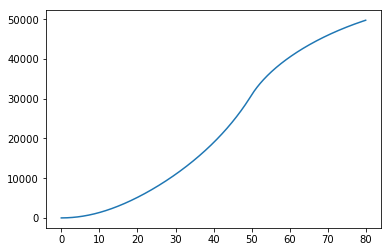

In [5]:
plt.plot(timeRange,ys)
plt.show()